In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

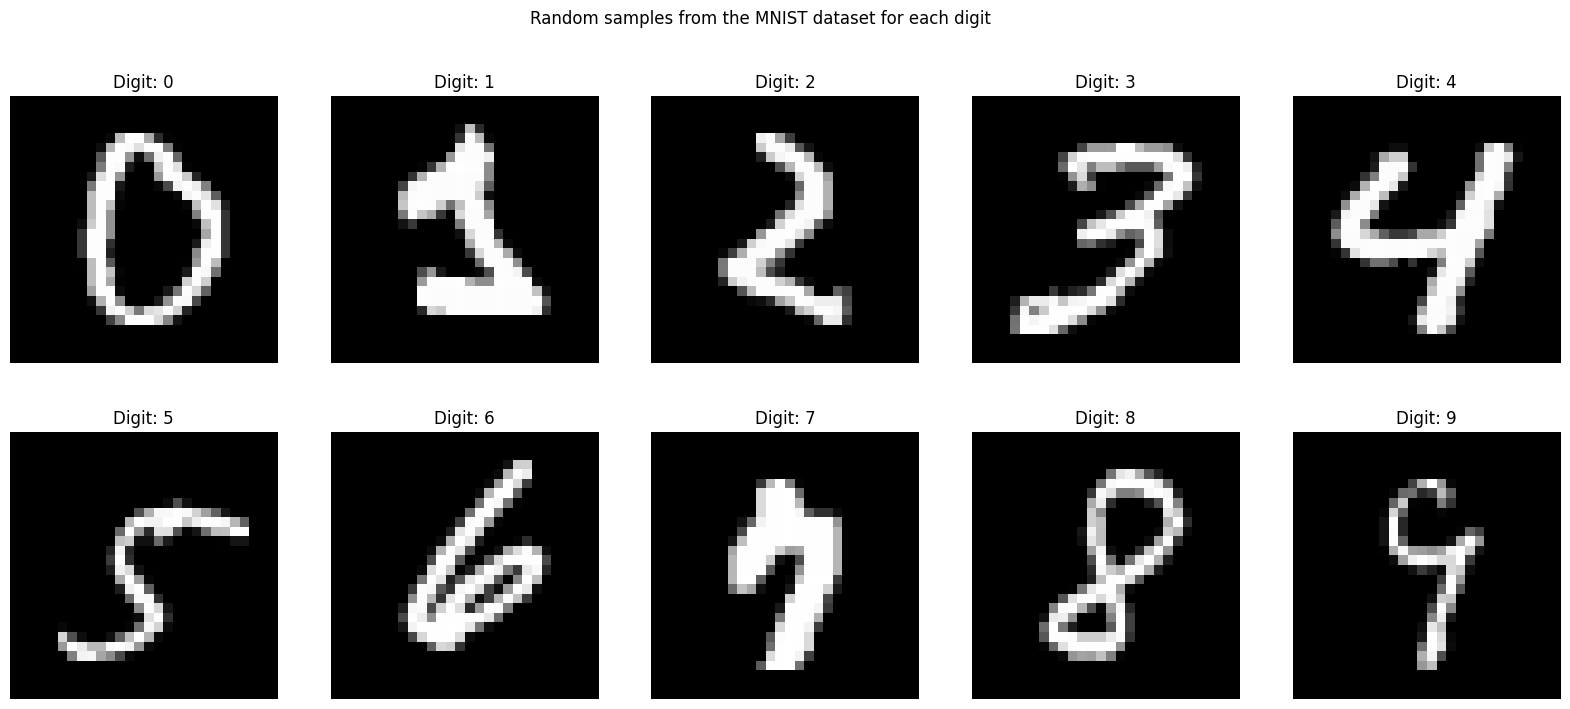

In [19]:
def plot_random_samples(x, y):
    # Create a figure with 10 subplots (2 rows and 5 columns)
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    fig.suptitle('Random samples from the MNIST dataset for each digit')

    # Plot a random sample for each digit (0-9)
    for digit in range(10):
        # Get all indices of the current digit
        digit_indices = np.where(y == digit)[0]
        # Randomly select one index
        random_index = np.random.choice(digit_indices)
        # Get the corresponding image
        random_image = x[random_index]

        # Determine the position in the grid
        row, col = divmod(digit, 5)

        # Plot the image
        axes[row, col].imshow(random_image, cmap='gray')
        axes[row, col].set_title(f'Digit: {digit}')
        axes[row, col].axis('off')

    plt.show()

# Plot random samples from the training set
plot_random_samples(x_train, y_train)

In [20]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

In [21]:
# Define the model
model = keras.Sequential(
    [
        layers.Dense(512, activation='relu', input_shape=(784,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(10),
    ]
)

# Compile the model
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'],
)

# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
)

In [22]:
# Train the model with validation data and early stopping
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/50
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2078 - accuracy: 0.9378 - val_loss: 0.1145 - val_accuracy: 0.9656
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0831 - accuracy: 0.9738 - val_loss: 0.1205 - val_accuracy: 0.9637
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0581 - accuracy: 0.9814 - val_loss: 0.0927 - val_accuracy: 0.9736
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0433 - accuracy: 0.9857 - val_loss: 0.0882 - val_accuracy: 0.9759
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0347 - accuracy: 0.9882 - val_loss: 0.0855 - val_accuracy: 0.9763
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.1070 - val_accuracy: 0.9757
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0928 - val_accuracy:

In [23]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


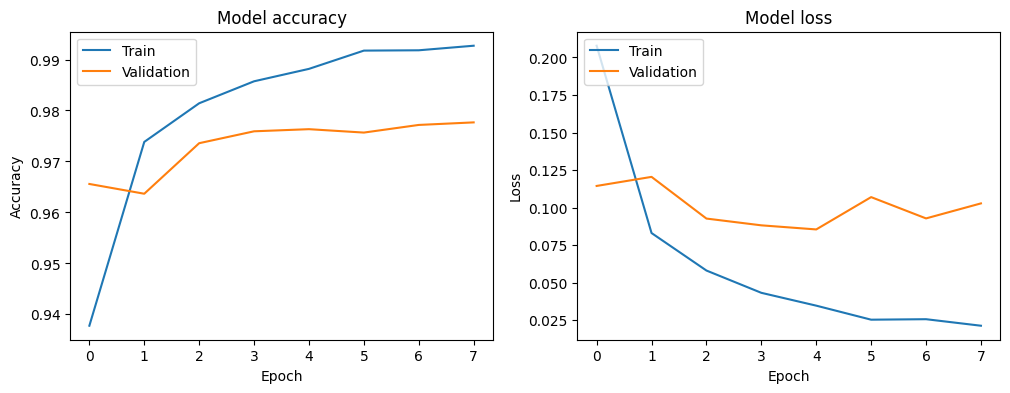

In [24]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [25]:
# Save the entire model to a HDF5 file
model.save("mnist_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
# Load the model
loaded_model = keras.models.load_model("mnist_model.h5")

# Evaluate the model to verify it's loaded correctly
loss, accuracy = loaded_model.evaluate(x_test, y_test)
print(f"Restored model accuracy: {accuracy*100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9792
Restored model accuracy: 97.92%
